                                 HEART FAILURE DETECTION USING MACHINE LEARNING ALGORITHMS


Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help

## Importing all the necessary libraries

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier



In [56]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\users\hp\anaconda3\anaconda\lib\site-packages (1.0.2)








In [2]:
df=pd.read_csv(r"C:\Users\hp\Downloads\archive (13)\heart.csv")

In [3]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

# Attributes Description 


"""Age: age of the patient [years]
    
Sex: sex of the patient [M: Male, F: Female]
    
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
RestingBP: resting blood pressure [mm Hg]
    
Cholesterol: serum cholesterol [mm/dl]
    
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
                                               
Oldpeak: oldpeak = ST [Numeric value measured in depression]
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease: output class [1: heart disease, 0: Normal]"""

## Checking the data type

In [4]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 918 entries, 0 to 917

Data columns (total 12 columns):

 #   Column          Non-Null Count  Dtype  

---  ------          --------------  -----  

 0   Age             918 non-null    int64  

 1   Sex             918 non-null    object 

 2   ChestPainType   918 non-null    object 

 3   RestingBP       918 non-null    int64  

 4   Cholesterol     918 non-null    int64  

 5   FastingBS       918 non-null    int64  

 6   RestingECG      918 non-null    object 

 7   MaxHR           918 non-null    int64  

 8   ExerciseAngina  918 non-null    object 

 9   Oldpeak         918 non-null    float64

 10  ST_Slope        918 non-null    object 

 11  HeartDisease    918 non-null    int64  

dtypes: float64(1), int64(6), object(5)

memory usage: 86.2+ KB


In [6]:
df.describe(include='all')

Age  Sex ChestPainType   RestingBP  Cholesterol   FastingBS  \
count   918.000000  918           918  918.000000   918.000000  918.000000   
unique         NaN    2             4         NaN          NaN         NaN   
top            NaN    M           ASY         NaN          NaN         NaN   
freq           NaN  725           496         NaN          NaN         NaN   
mean     53.510893  NaN           NaN  132.396514   198.799564    0.233115   
std       9.432617  NaN           NaN   18.514154   109.384145    0.423046   
min      28.000000  NaN           NaN    0.000000     0.000000    0.000000   
25%      47.000000  NaN           NaN  120.000000   173.250000    0.000000   
50%      54.000000  NaN           NaN  130.000000   223.000000    0.000000   
75%      60.000000  NaN           NaN  140.000000   267.000000    0.000000   
max      77.000000  NaN           NaN  200.000000   603.000000    1.000000   

       RestingECG       MaxHR ExerciseAngina     Oldpeak ST_Slope  \
count         918  918.000000            918  918.000000      918   
unique          3         NaN              2         NaN        3   
top        Normal         NaN              N         NaN     Flat   
freq          552         NaN            547         NaN      460   
mean          NaN  136.809368            NaN    0.887364      NaN   
std           NaN   25.460334            NaN    1.066570      NaN   
min           NaN   60.000000            NaN   -2.600000      NaN   
25%           NaN  120.000000            NaN    0.000000      NaN   
50%           NaN  138.000000            NaN    0.600000      NaN   
75%           NaN  156.000000            NaN    1.500000      NaN   
max           NaN  202.000000            NaN    6.200000      NaN   

        HeartDisease  
count     918.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.553377  
std         0.497414  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         1.000000  
max         1.000000

## Finding the correlation 

### we need to check  if there any correlation between variables and we remove those variables to increase our model efficiency 

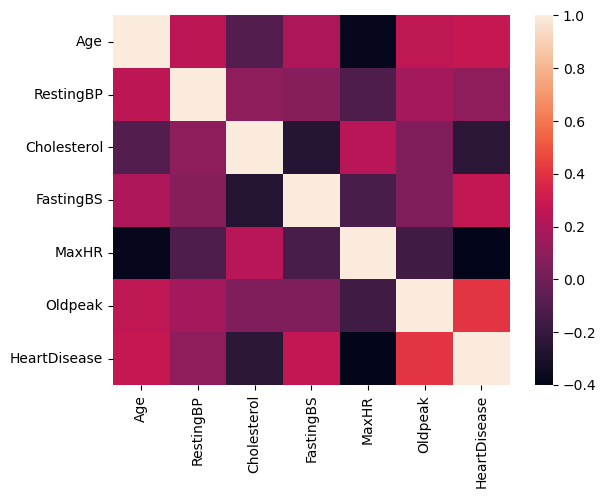

In [7]:
corr=df.corr()
sns.heatmap(corr,cbar=True)
plt.show()

As we can see there is no correlation between variables so we can easily identify the effect of independent variables on dependent variables


In [8]:
## Distribution of heart disease in male and female

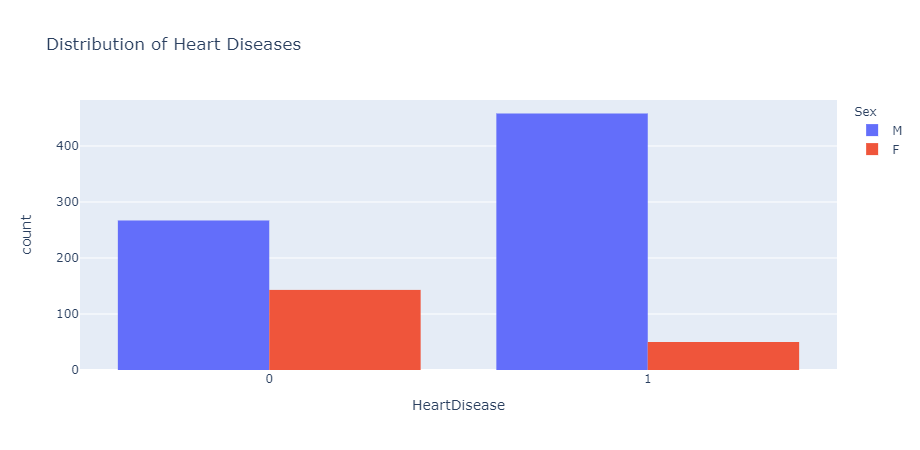

In [9]:
fig=px.histogram(df, 
                 x="HeartDisease",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

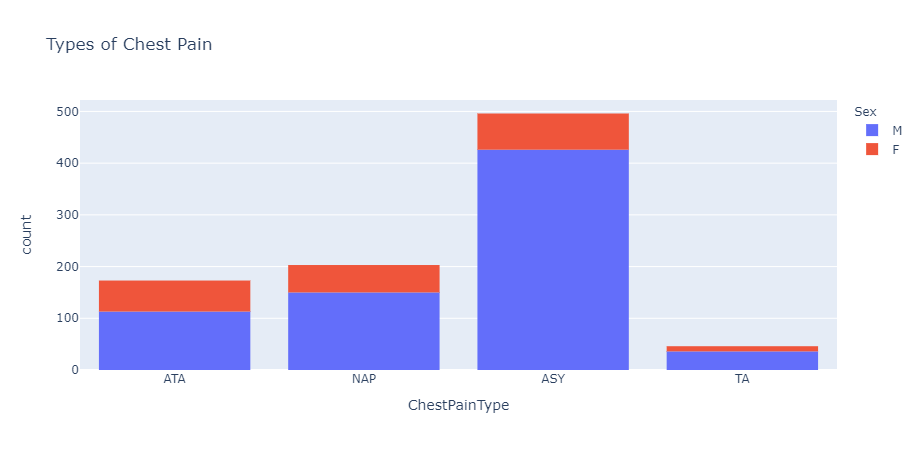

In [10]:
fig=px.histogram(df,
                 x="ChestPainType",
                 color="Sex",
                 hover_data=df.columns,
                 title="Types of Chest Pain"
                )
fig.show()

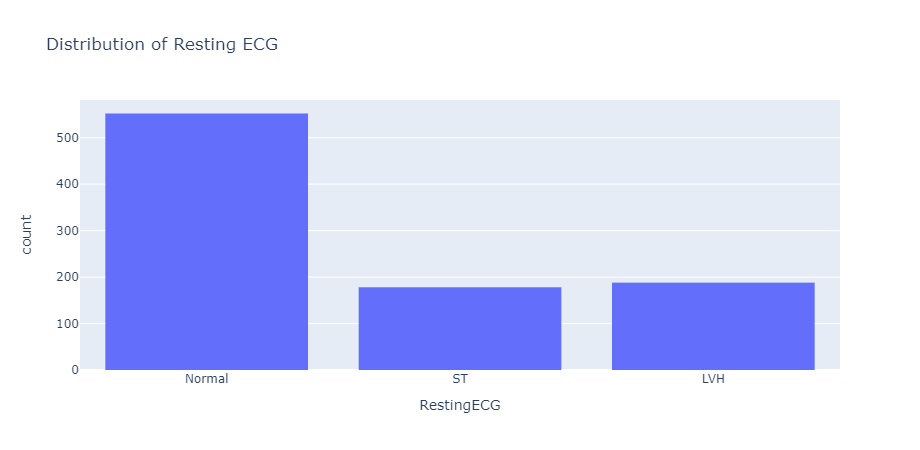

In [11]:
fig=px.histogram(df,
                 x="RestingECG",
                 hover_data=df.columns,
                 title="Distribution of Resting ECG")
fig.show()

To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.

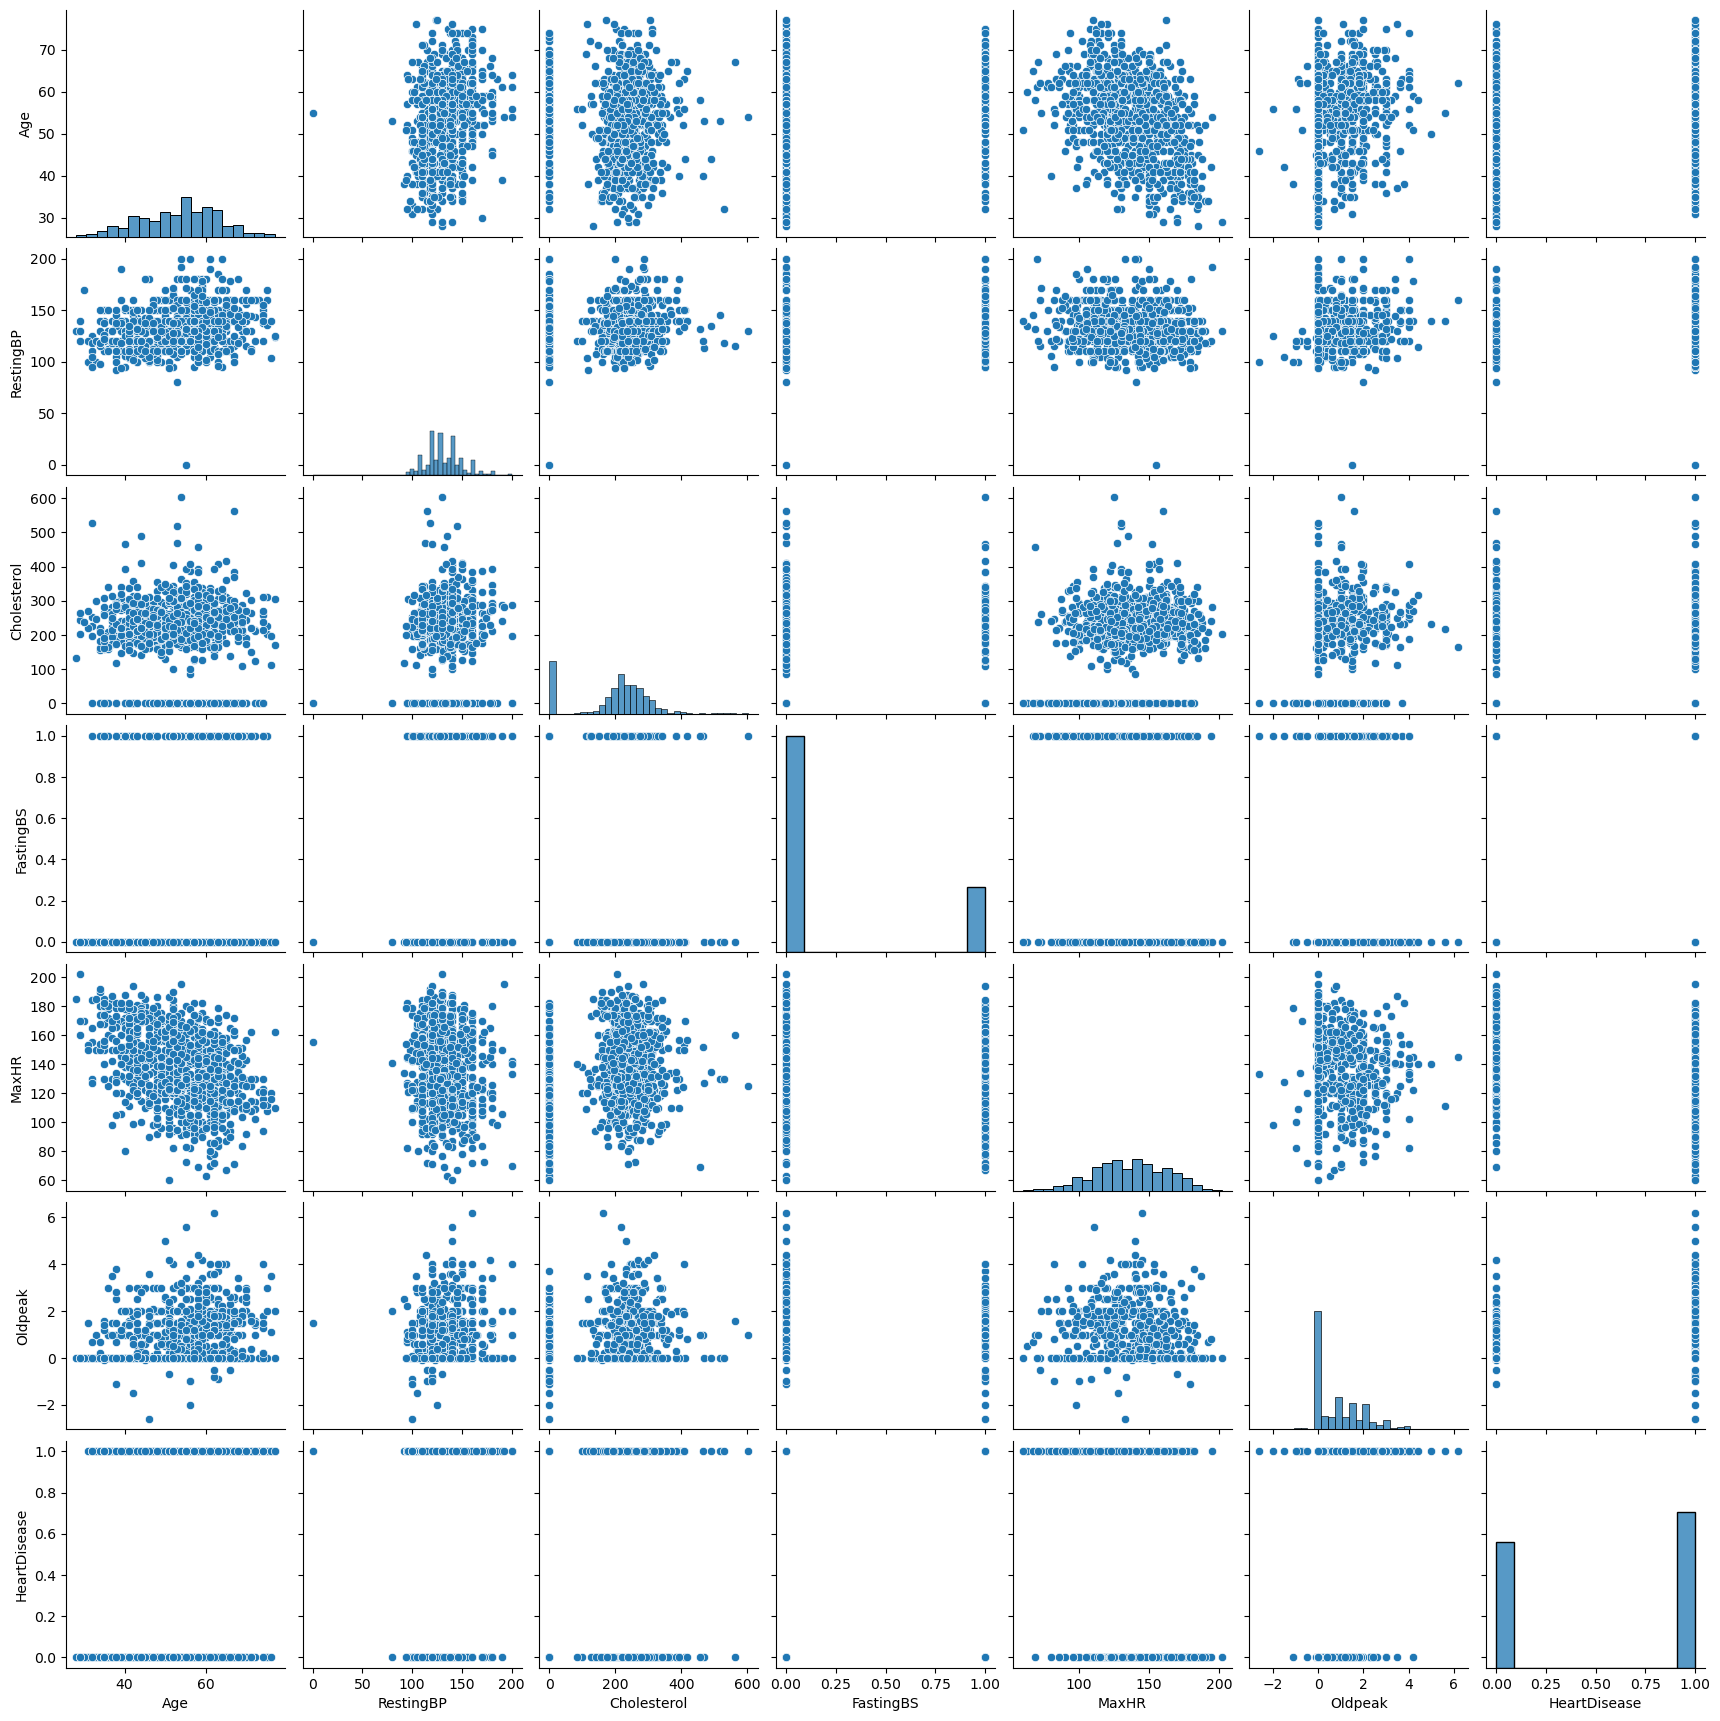

In [12]:
sns.pairplot(data=df)

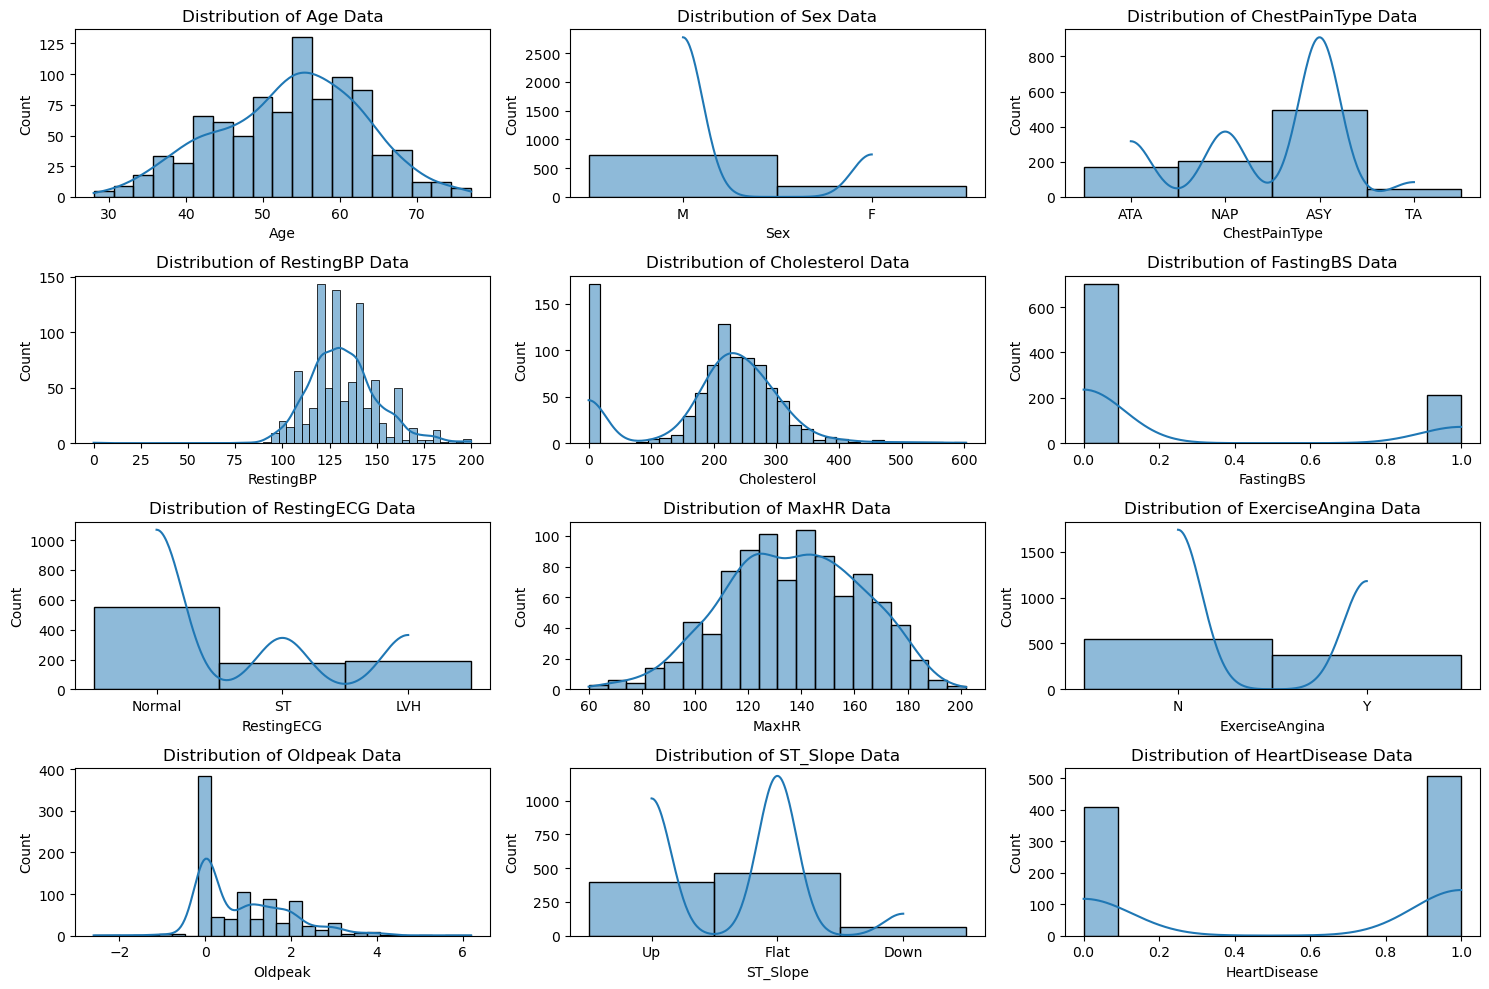

In [13]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

# Outliers


A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables.The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.The box plot (a.k.a. box and whisker diagram) is a standardized way of displaying the distribution of data based on the five number summary:

Minimum
First quartile
Median
Third quartile
Maximum.
In the simplest box plot the central rectangle spans the first quartile to the third quartile (the interquartile range or IQR).A segment inside the rectangle shows the median and “whiskers” above and below the box show the locations of the minimum and maximum

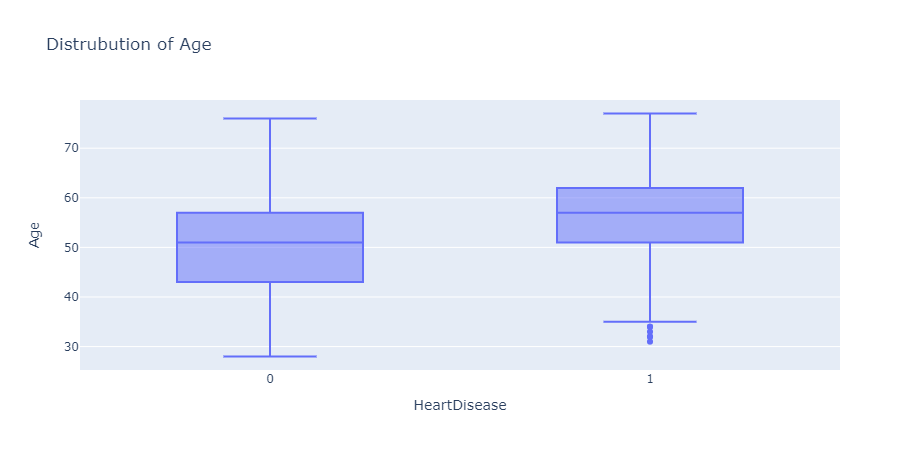

In [17]:
fig = px.box(df,y="Age",x="HeartDisease",title=f"Distrubution of Age")
fig.show()

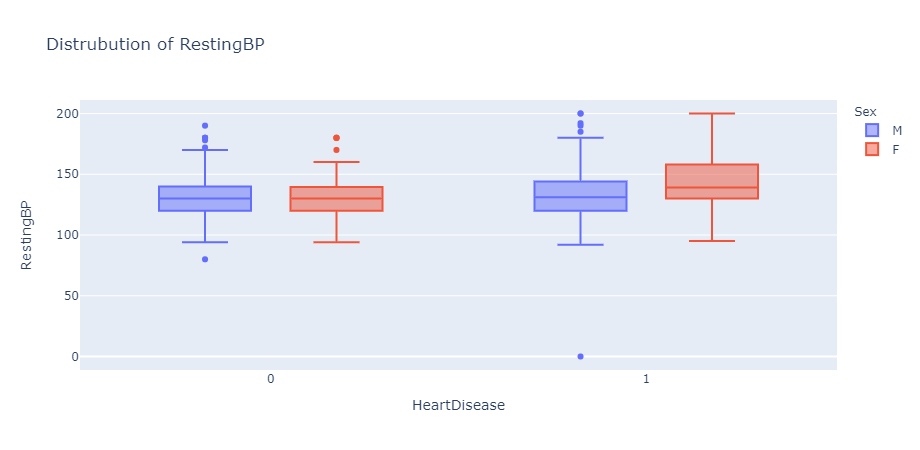

In [18]:
fig = px.box(df,y="RestingBP",x="HeartDisease",title=f"Distrubution of RestingBP",color="Sex")
fig.show()

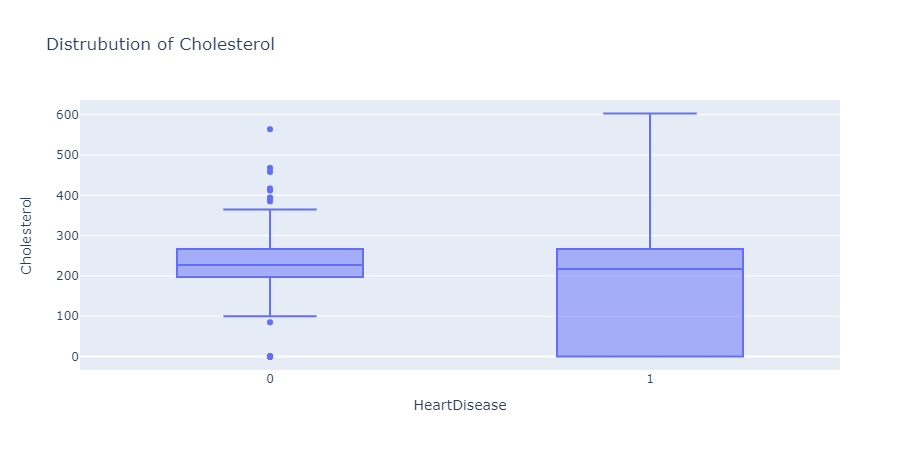

In [19]:
fig = px.box(df,y="Cholesterol",x="HeartDisease",title=f"Distrubution of Cholesterol")
fig.show()

# Converting categorical data into numerical

In [22]:
categorical=[col for col in df.columns if df[col].dtypes=='O']

In [23]:
categorical

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [25]:
for x in categorical:
    df[x]=pd.Categorical(df[x])
    df[x]=df[x].cat.codes

In [26]:
df.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0

In [27]:
df.dtypes

Age                 int64
Sex                  int8
ChestPainType        int8
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG           int8
MaxHR               int64
ExerciseAngina       int8
Oldpeak           float64
ST_Slope             int8
HeartDisease        int64
dtype: object

In [28]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# outliers using 3 standard deviation

In [32]:
columns=list(df.columns)
for x in columns:
    m=df[x].mean()
    sd=df[x].std()
    upperlimit=m+3*sd
    lowerlimit=m-3*sd
    df=df[(df[x]>=lowerlimit) & (df[x]<=upperlimit)]

In [33]:
columns

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

In [35]:
df.shape
# using 3 standard deviation we are removing outliers 

(890, 12)

In [36]:
918-890

28

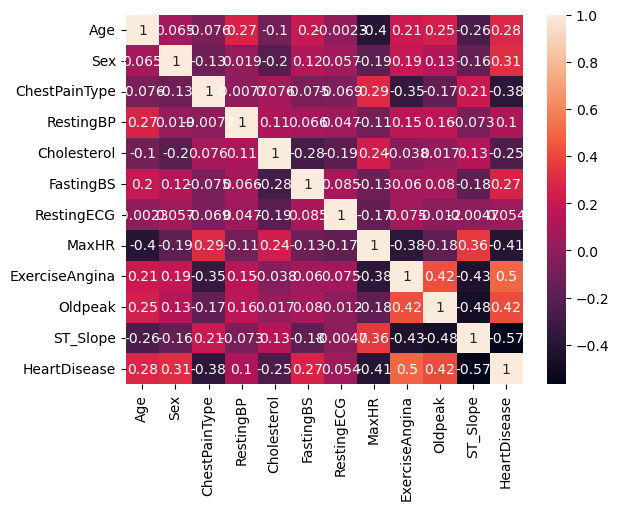

In [38]:
corr=df.corr()
sns.heatmap(corr,annot=True,cbar=True)
plt.show()

In [40]:
X=df.drop('HeartDisease',axis=1)
Y=df['HeartDisease']

In [42]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,random_state=5,test_size=0.25)

In [43]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(667, 11)

(223, 11)

(667,)

(223,)


In [73]:
model_logit=LogisticRegression()
model_logit.fit(train_x,train_y)
pv_logit=model_logit.predict(test_x)
print('Accuracy_score for logistic regression',accuracy_score(test_y,pv_logit))

Accuracy_score for logistic regression 0.8475336322869955


C:\Users\hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:



lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




Using Decission tree Classifier
A decision tree is a supervised learning algorithm that is perfect for classification problems, as it’s able to order classes on a precise level. It works like a flow chart, separating data points into two similar categories at a time from the “tree trunk” to “branches,” to “leaves,” where the categories become more finitely similar. This creates categories within categories, allowing for organic classification with limited human supervision.


In [72]:
model_dt=DecisionTreeClassifier()
model_dt.fit(train_x,train_y)
pv_dt=model_dt.predict(test_x)
print('Accuracy_score for Desicion tree ',accuracy_score(test_y,pv_dt))


Accuracy_score for Desicion tree  0.7802690582959642


In [60]:
model_rf=RandomForestClassifier(n_estimators=196)
model_rf.fit(train_x,train_y)
pv_rf=model_rf.predict(test_x)
print('Accuracy_score for Random Forest is',accuracy_score(test_y,pv_rf))

Accuracy_score for Random Forest is 0.8609865470852018


In [61]:
for x in range (10,30):
    model_rf=RandomForestClassifier(n_estimators=196)
    model_rf.fit(train_x,train_y)
    pv_rf=model_rf.predict(test_x)
    print('Accuracy_score for Random Forest is' ,x, accuracy_score(test_y,pv_rf))

Accuracy_score for Random Forest is 10 0.8609865470852018

Accuracy_score for Random Forest is 11 0.874439461883408

Accuracy_score for Random Forest is 12 0.8609865470852018

Accuracy_score for Random Forest is 13 0.8565022421524664

Accuracy_score for Random Forest is 14 0.8609865470852018

Accuracy_score for Random Forest is 15 0.8699551569506726

Accuracy_score for Random Forest is 16 0.8699551569506726

Accuracy_score for Random Forest is 17 0.8609865470852018

Accuracy_score for Random Forest is 18 0.8699551569506726

Accuracy_score for Random Forest is 19 0.8654708520179372

Accuracy_score for Random Forest is 20 0.8699551569506726

Accuracy_score for Random Forest is 21 0.8565022421524664

Accuracy_score for Random Forest is 22 0.8654708520179372

Accuracy_score for Random Forest is 23 0.8654708520179372

Accuracy_score for Random Forest is 24 0.8609865470852018

Accuracy_score for Random Forest is 25 0.874439461883408

Accuracy_score for Random Forest is 26 0.8789237668161435


# Feature importance selection

In [62]:
# in feature importance selection we are selecting most relevant feature for our data prediction or model and remove 
#irrelevant feature which increase the accuracy of the model 

In [63]:
feature_importance=model_dt.feature_importances_
feature_importance

array([0.05648296, 0.03067674, 0.10703305, 0.04840882, 0.06667813,
       0.02674257, 0.01834483, 0.12481034, 0.01460705, 0.10417419,
       0.40204131])

In [64]:
sorted_idx=np.argsort(feature_importance)
feature_importance

array([0.05648296, 0.03067674, 0.10703305, 0.04840882, 0.06667813,
       0.02674257, 0.01834483, 0.12481034, 0.01460705, 0.10417419,
       0.40204131])

Text(0.5, 1.0, 'Feature importance')

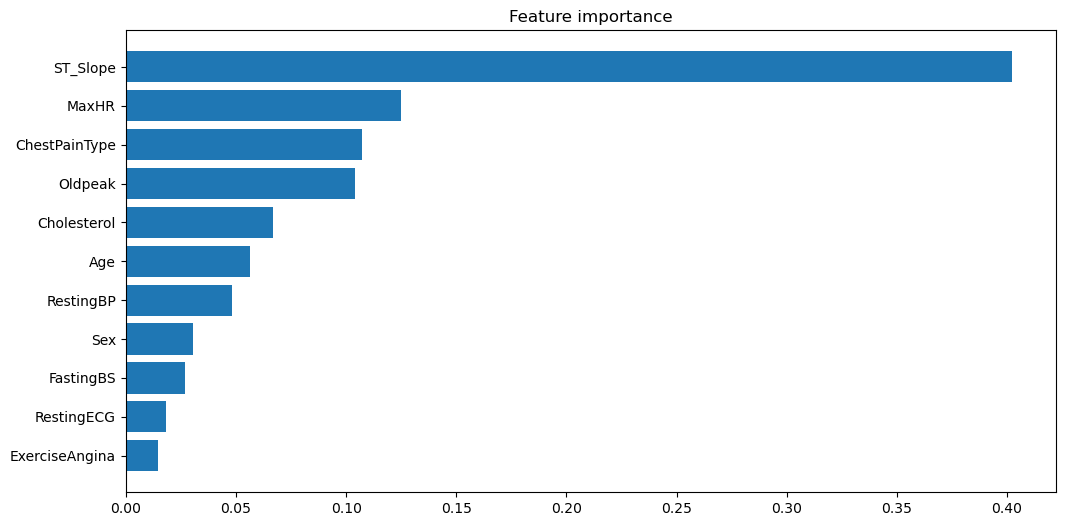

In [65]:
fig=plt.figure(figsize=(12,6))
plt.barh(range(len(sorted_idx)),feature_importance[sorted_idx],align='center')
plt.yticks(range(len(sorted_idx)),np.array(test_x.columns)[sorted_idx])
plt.title('Feature importance')

In [66]:
sorted_idx=np.argsort(feature_importance)
feature=list(train_x.columns)
importances=[(f,round(imp,3)) for f,imp in zip(feature,feature_importance)]
importances

[('Age', 0.056),
 ('Sex', 0.031),
 ('ChestPainType', 0.107),
 ('RestingBP', 0.048),
 ('Cholesterol', 0.067),
 ('FastingBS', 0.027),
 ('RestingECG', 0.018),
 ('MaxHR', 0.125),
 ('ExerciseAngina', 0.015),
 ('Oldpeak', 0.104),
 ('ST_Slope', 0.402)]

In [67]:
importances=sorted(importances,key=lambda x:x[1],reverse=True)
importances

[('ST_Slope', 0.402),
 ('MaxHR', 0.125),
 ('ChestPainType', 0.107),
 ('Oldpeak', 0.104),
 ('Cholesterol', 0.067),
 ('Age', 0.056),
 ('RestingBP', 0.048),
 ('Sex', 0.031),
 ('FastingBS', 0.027),
 ('RestingECG', 0.018),
 ('ExerciseAngina', 0.015)]

In [68]:
list1=[]
for x in importances:
    if x[1]>=0.04:
        list1.append(x[0])
print(list1)     

['ST_Slope', 'MaxHR', 'ChestPainType', 'Oldpeak', 'Cholesterol', 'Age', 'RestingBP']


In [69]:
newtrain_x=train_x[list1]
newtest_x=test_x[list1]

In [70]:
model_dt1=DecisionTreeClassifier()
model_dt1.fit(newtrain_x,train_y)
pv_dt1=model_dt1.predict(newtest_x)
print("Accuracy of the model",accuracy_score(test_y,pv_dt1))

Accuracy of the model 0.7892376681614349


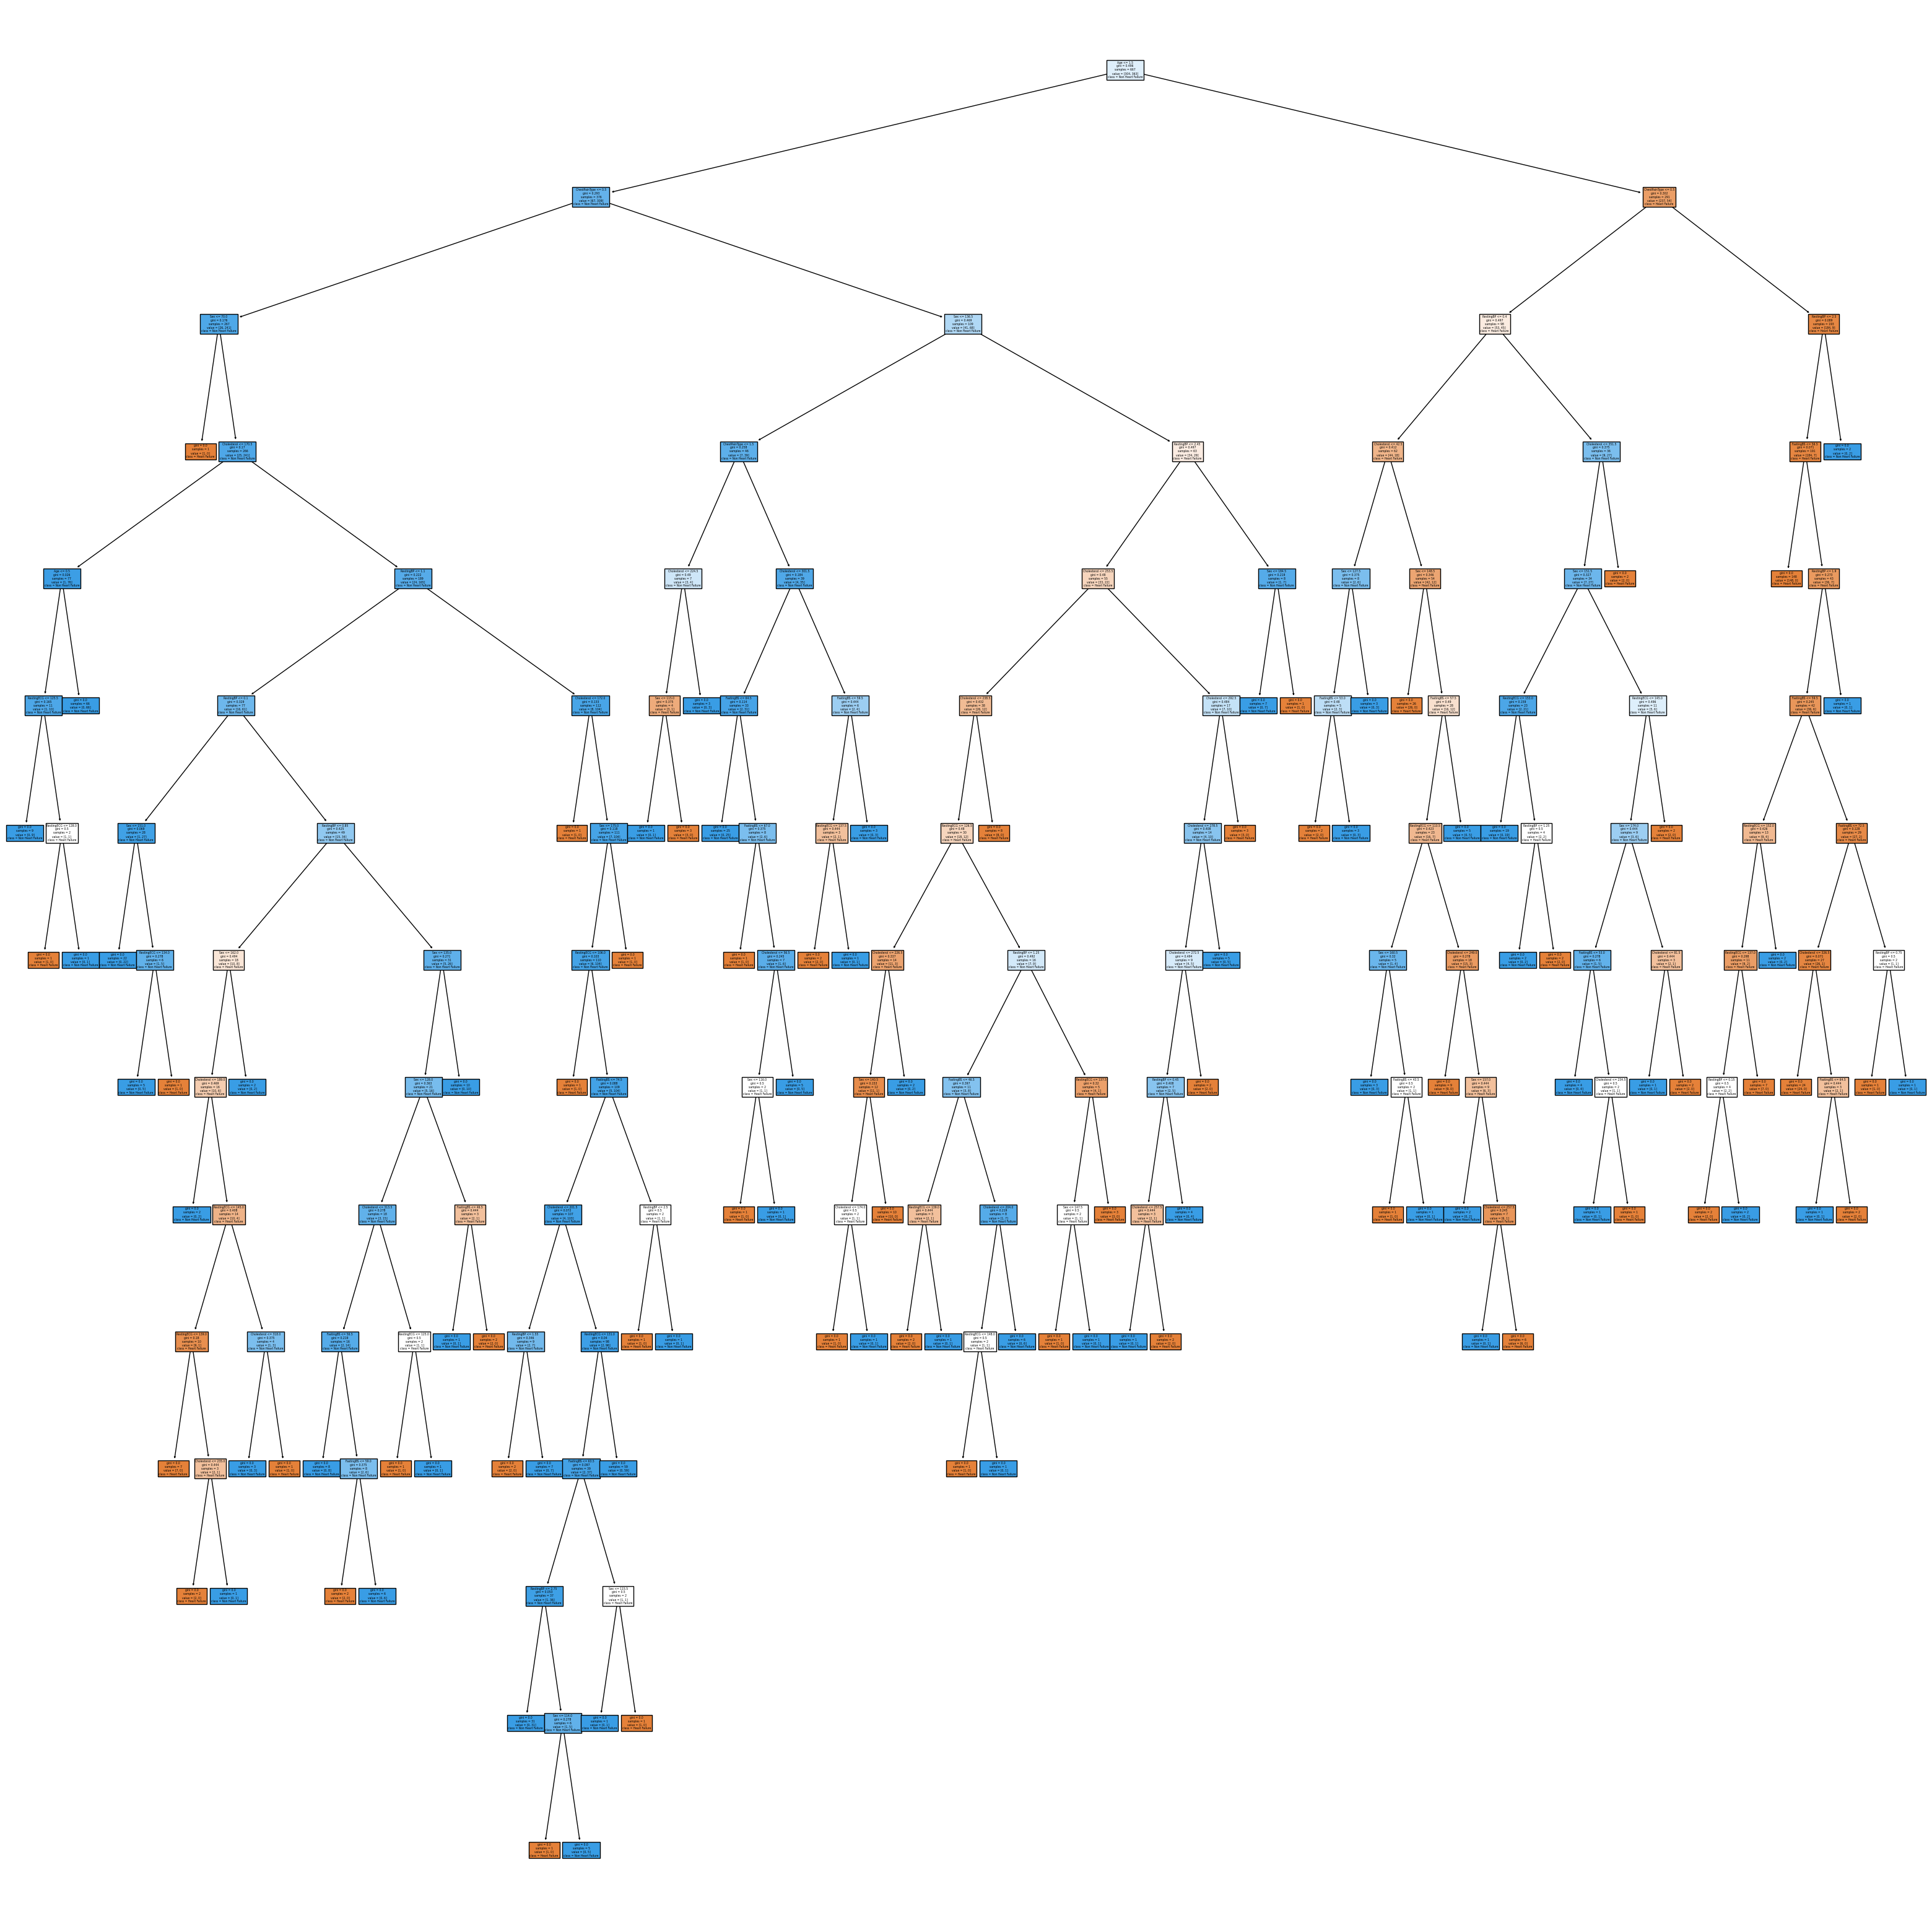

In [71]:
plt.figure(figsize=(40,40))
features=df.columns
classes=['Heart Failure','Non Heart Failure']
tree.plot_tree(model_dt1,feature_names=feature,class_names=classes,filled=True)
#plt.savefig(r"C:\Users\hp\Desktop\sql enhancement classes\diabetes.png")
plt.show()